## Some inputs

In [1]:
import scipy
import matplotlib.pyplot
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import nbinom
from scipy.stats import entropy

import matplotlib.pyplot as plt

import muon as mu
from muon import atac as ac

/home/annac/mambaforge/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/annac/mambaforge/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/annac/mambaforge/lib/python3.8/site-packages/umap/distances.py:1086: NumbaDeprecationWarni

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import r_regression

## Reading data

In [3]:
mdata = mu.read("/home/annac/datasets/kidney_10x/kidney_filtered_withQC.h5mu")

In [4]:
atac = mdata['atac']
atac

AnnData object with n_obs × n_vars = 12721 × 67150
    obs: 'n_features_per_cell', 'total_fragment_counts', 'NS', 'nucleosome_signal', 'nuc_signal_filter', 'tss_score'
    var: 'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'files'

In [5]:
atac.write_h5ad('/home/annac/datasets/kidney_10x/kidney_filtered_atac.h5ad')

In [6]:
just_matrix = atac.X

## Mean - var relations 

In [40]:
scaler_for_regions = StandardScaler(with_mean=False)
scaler_for_cells = StandardScaler(with_mean=False)

In [42]:
scaler_for_regions.fit(just_matrix)
scaler_for_cells.fit(just_matrix.T)

mean_var_regions = pd.DataFrame({'vars': scaler_for_regions.var_, 'means': scaler_for_regions.mean_})
mean_var_cells = pd.DataFrame({'vars': scaler_for_cells.var_, 'means': scaler_for_cells.mean_})

In [43]:
mean_var_regions.shape

(67150, 2)

In [44]:
mean_var_cells.shape

(12721, 2)

<Axes: xlabel='means', ylabel='vars'>

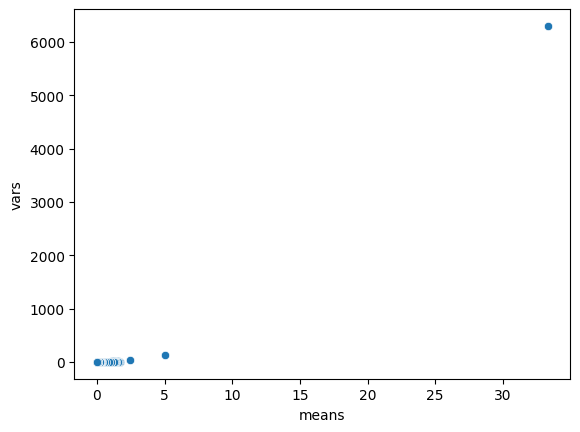

In [57]:
sns.scatterplot(data=mean_var_regions, x="means", y="vars")

<Axes: xlabel='means', ylabel='vars'>

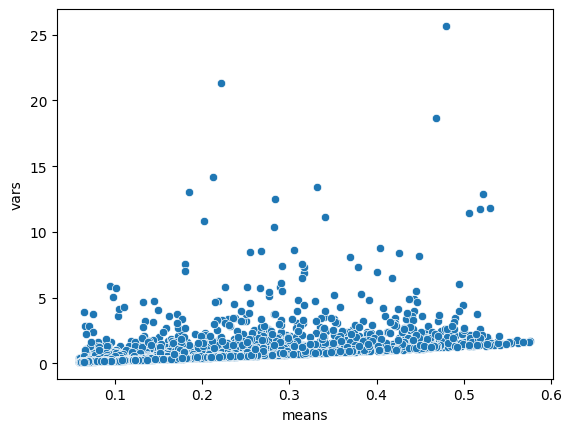

In [53]:
sns.scatterplot(data=mean_var_cells, x="means", y="vars")

## Pearson correlation between cells

In [9]:
df_over_regions = pd.DataFrame.sparse.from_spmatrix(just_matrix)
df_over_cells = pd.DataFrame.sparse.from_spmatrix(just_matrix.T)

In [7]:
just_matrix = just_matrix.toarray()

In [8]:
just_matrix = just_matrix.astype('int32')

In [9]:
just_matrix.dtype

dtype('int32')

In [10]:
just_matrix[1, :].shape

(67150,)

In [18]:
!pwd

/home/annac/datasets/kidney_10x


In [11]:
just_matrix.shape # 12k rows and 67k cols

(12721, 67150)

In [12]:
matrix_for_genes = just_matrix
matrix_for_cells = just_matrix.T

In [17]:
np.save('matrix_for_genes', matrix_for_genes)
np.save('matrix_for_cells', matrix_for_cells)

In [13]:
y_for_genes_first = matrix_for_cells[0]

In [15]:
from multiprocessing import Pool

In [14]:
# calculate the correlation matrix on the numeric columns
# corr = df_over_cells.corr() - using Pandas - slow

first = r_regression(matrix_for_genes, matrix_for_cells[0])
corr_matrix_genes = np.array(first)
for gene_a in range(1, 67150):
    next = r_regression(matrix_for_genes, matrix_for_cells[gene_a])   # X = (n_samples, n_features), Y = (n_samples,)
    corr_matrix_genes = np.vstack((corr_matrix_genes, next))

# plot the heatmap
#sns.heatmap(corr)

KeyboardInterrupt: 

In [ ]:
# save the matrix



In [25]:
first = r_regression(matrix_for_cells, matrix_for_cells[0])
corr_matrix_genes = np.array(first)

for cell_a in range(1, 12721):
    next = r_regression(matrix_for_genes, matrix_for_cells[gene_a])   # X = (n_samples, n_features), Y = (n_samples,)
    arr = np.vstack((corr_matrix_genes, next))

In [26]:
len()

12721

In [19]:
np.zeros((2, 2))

array([[0., 0.],
       [0., 0.]])

In [ ]:
# calculate the correlation matrix on the numeric columns
corr_regions = df_over_regions.corr()

# plot the heatmap
sns.heatmap(corr_regions)

## Shanon entropy between cells

In [24]:
just_matrix[1]

<1x67150 sparse matrix of type '<class 'numpy.float32'>'
	with 5028 stored elements in Compressed Sparse Row format>

In [23]:
just_matrix[:,  1]

<12721x1 sparse matrix of type '<class 'numpy.float32'>'
	with 521 stored elements in Compressed Sparse Row format>

In [11]:
just_matrix[1]

<1x67150 sparse matrix of type '<class 'numpy.float32'>'
	with 5028 stored elements in Compressed Sparse Row format>

In [25]:
entropy(just_matrix[:,  1])

matrix([[nan]])